# *Movie Industry*: Four Decades of Movie

## Context
    Is the movie industry dying? is Netflix the new entertainment king? Those were the first questions that lead me to create a dataset focused on movie revenue and analyze it over the last decades. But, why stop there? There are more factors that intervene in this kind of thing, like actors, genres, user ratings and more. And now, anyone with experience (you) can ask specific questions about the movie industry, and get answers.

## Acknowledgement
    This data was scraped from IMDb.

## Source:
    https://www.kaggle.com/danielgrijalvas/movies

In [1]:
# Import all necessary libraries

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read in the data

og = pd.read_csv(r'C:\Users\jeyan\Desktop\Python\Projects\Correlation\movies.csv')

In [3]:
df = og
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
og.shape

(7668, 15)

In [5]:
og.describe().T

,count,mean,std,min,25%,50%,75%,max
year,7668.0,2.000405e+03,1.115351e+01,1980.0,1991.0,2000.0,2010.0,2.020000e+03
score,7665.0,6.390411e+00,9.688416e-01,1.9,5.8,6.5,7.1,9.300000e+00
votes,7665.0,8.810850e+04,1.633238e+05,7.0,9100.0,33000.0,93000.0,2.400000e+06
budget,5497.0,3.558988e+07,4.145730e+07,3000.0,10000000.0,20500000.0,45000000.0,3.560000e+08
gross,7479.0,7.850054e+07,1.657251e+08,309.0,4532055.5,20205757.0,76016691.5,2.847246e+09
runtime,7664.0,1.072616e+02,1.858125e+01,55.0,95.0,104.0,116.0,3.660000e+02


In [6]:
og.describe().T.style.highlight_max(color = 'lightgreen')

,count,mean,std,min,25%,50%,75%,max
year,7668.000000,2000.405451,11.153508,1980.000000,1991.000000,2000.000000,2010.000000,2020.000000
score,7665.000000,6.390411,0.968842,1.900000,5.800000,6.500000,7.100000,9.300000
votes,7665.000000,88108.504762,163323.763910,7.000000,9100.000000,33000.000000,93000.000000,2400000.000000
budget,5497.000000,35589876.192651,41457296.601931,3000.000000,10000000.000000,20500000.000000,45000000.000000,356000000.000000
gross,7479.000000,78500541.017783,165725124.318757,309.000000,4532055.500000,20205757.000000,76016691.500000,2847246203.000000
runtime,7664.000000,107.261613,18.581247,55.000000,95.000000,104.000000,116.000000,366.000000


---

## Data Cleaning

In [7]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [8]:
# Checks for NULL values (rows)

nan_df = df[df.isna().any(axis = 1)]
nan_df.shape

(2247, 15)

In [9]:
df.dropna(inplace = True)
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [10]:
df.shape

(5421, 15)

In [11]:
# Check for duplicates

df.duplicated().sum()

0

In [12]:
# Change the datatype of columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [13]:
df['year'].isnull().sum()

0

In [14]:
# Gets the year of released from the released column

#df['year'] = df['released'].str.split(',').str[1].str[1:5]
#df['year'] = df['year'].astype('int64')
#df.head()

---

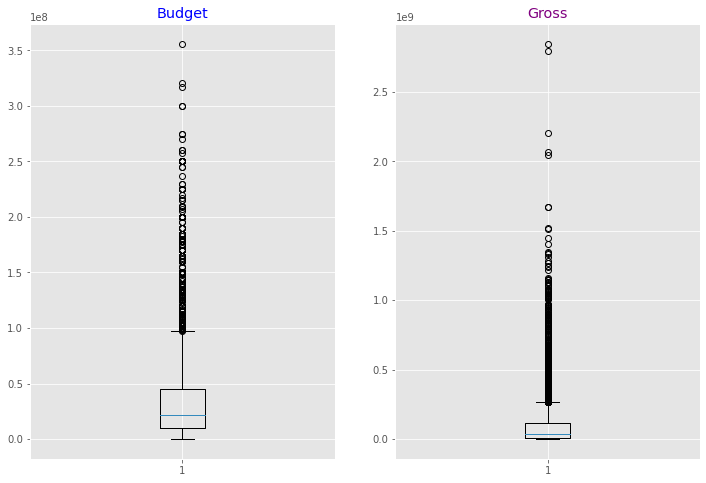

In [56]:
f, (ax1, ax2) = plt.subplots(1, 2)

ax1.boxplot(df.budget)
ax1.set_title('Budget', c = 'blue')
ax2.boxplot(df.gross)
ax2.set_title('Gross', c ='purple')

plt.show()

---

In [16]:
df['country_released'] = df['released'].str.split(',').str[1].str[7:-1]
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,country_released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,United States


In [17]:
df['country_released'].value_counts().to_frame()

,country_released
United States,5066
United Kingdom,86
France,41
Germany,25
Spain,14
Canada,13
Australia,13
Japan,11
South Korea,10
Italy,10


In [18]:
df.sort_values(by = ['gross'], inplace = False, ascending = False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,country_released
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,United States
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,United States
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,United States
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,United States


---

In [19]:
# Check if country_released == country
#df1 = df
#df1['exists'] = df1['country_released'].isin(df1['country'])
#df1['exists'].value_counts()

True     5384
False      37
Name: exists, dtype: int64

In [20]:
#df1.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,country_released,exists
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,United States,True
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,United States,True
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,United States,True
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,United States,True
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,United States,True


In [21]:
#df1.loc[df1['exists'] == 'True']

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,country_released,exists


In [22]:
# Check the rows that are not matching.

#df1.loc[df1['exists'] == 'False']

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,country_released,exists


---

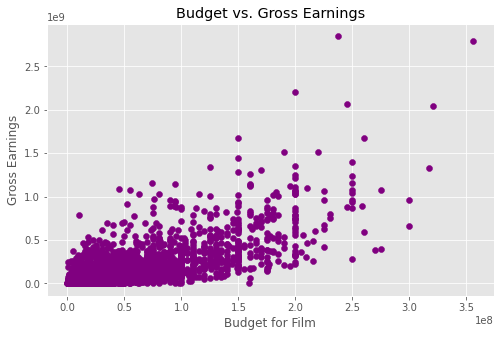

In [39]:
# Scatterplot: Budget vs Gross

plt.figure(figsize = (8, 5))
x = df['budget']
y = df['gross']
plt.scatter(x, y, color = "purple")
plt.title('Budget vs. Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

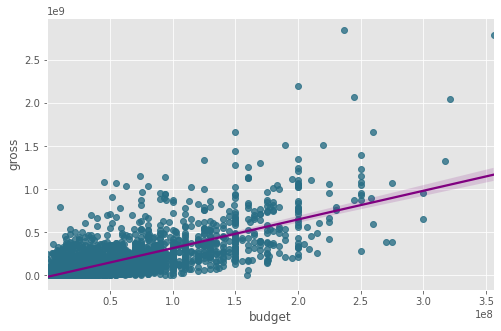

In [38]:
# Plot budget vs Gross

plt.figure(figsize = (8, 5))
sns.regplot(x, y, data = df, scatter_kws = {"color": "#296E85"}, line_kws = {"color": "purple"})
plt.show()

In [25]:
df.corr()

,year,score,votes,budget,gross,runtime,exists
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,-0.002876
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.015410
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.032843
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.051021
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.044224
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.028653
exists,-0.002876,0.015410,0.032843,0.051021,0.044224,0.028653,1.000000


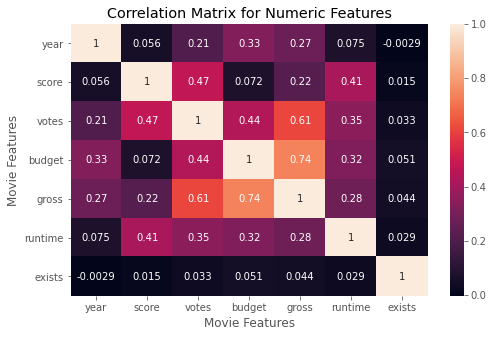

In [26]:
plt.figure(figsize = (8, 5))
plt.title('Correlation Matrix for Numeric Features')
sns.heatmap(df.corr(), annot = True, cmap = "rocket")
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [30]:
# Category -> Numerize(?)
# Correlates all the movie features

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,country_released,exists
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,47,True
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,47,True
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,47,True
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,47,True
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,47,True


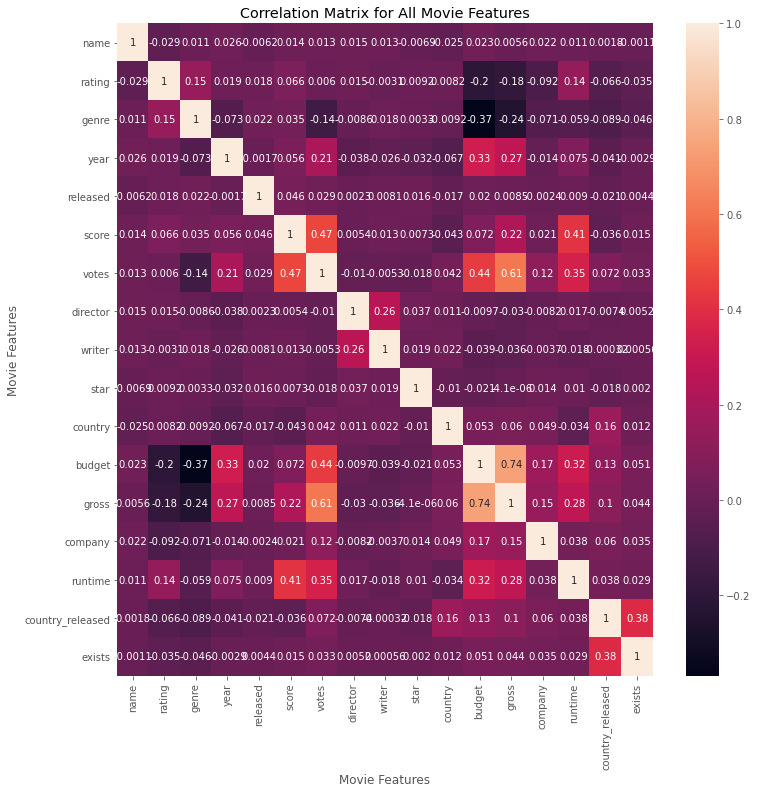

In [57]:
plt.figure(figsize = (12, 12))
plt.title('Correlation Matrix for All Movie Features')
sns.heatmap(df_numerized.corr(), annot = True, cmap = "rocket")
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [60]:
# Unstack - pivots a level of the (necessarily hierarchical) index labels
# Correlation of all features (pivot table)

corr_matrix = df_numerized.corr()
pivot_corr = corr_matrix.unstack()
pivot_corr.to_frame()

0
name   name              1.000000
       rating           -0.029234
       genre             0.010996
       year              0.025542
       released         -0.006152
...                           ...
exists gross             0.044224
       company           0.035260
       runtime           0.028653
       country_released  0.382562
       exists            1.000000

[289 rows x 1 columns]

In [61]:
pair_corr = pivot_corr.sort_values()
pair_corr.to_frame()

,,0
genre,budget,-0.368523
budget,genre,-0.368523
gross,genre,-0.244101
genre,gross,-0.244101
rating,budget,-0.203946
...,...,...
year,year,1.000000
genre,genre,1.000000
rating,rating,1.000000
country_released,country_released,1.000000


In [70]:
pair_corr[(pair_corr >= 0.5) & (pair_corr < 1.00)].to_frame()

,,0
gross,votes,0.614751
votes,gross,0.614751
budget,gross,0.740247
gross,budget,0.740247


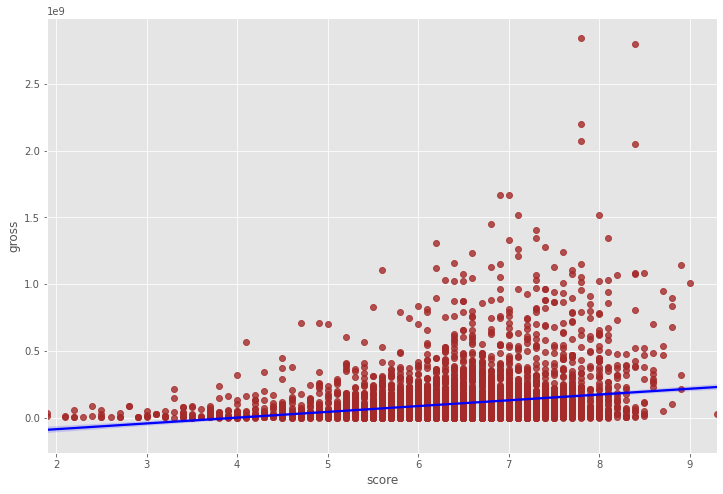

In [72]:
# Regression Plot of Gross Earnings and Score

sns.regplot(x = 'score', y = 'gross', data = df, scatter_kws = {'color': 'brown'}, line_kws = {'color': 'blue'})
plt.show()

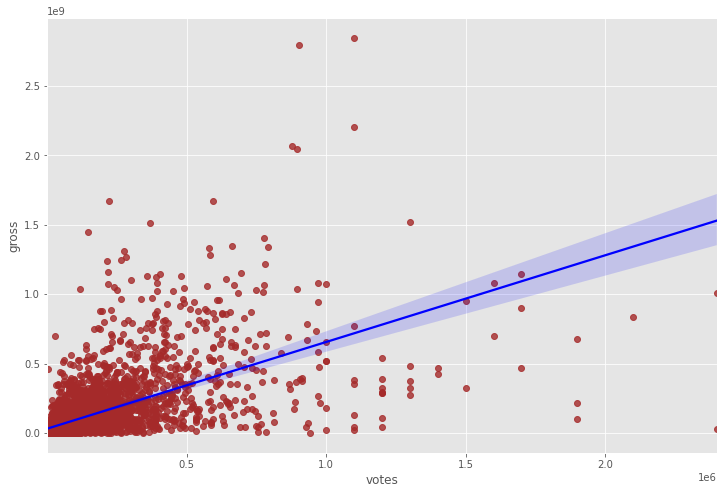

In [73]:
# Regression Plot of Gross Earnings and Votes

sns.regplot(x = 'votes', y = 'gross', data = df, scatter_kws = {'color': 'brown'}, line_kws = {'color': 'blue'})
plt.show()

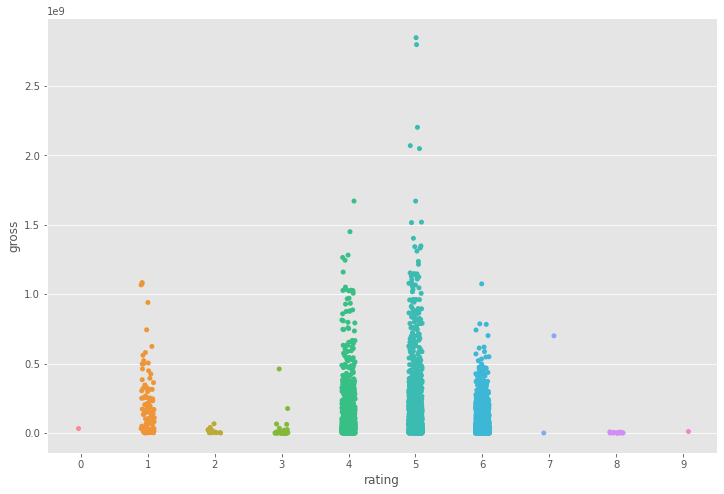

In [74]:
# Gross Earning with Respect to Movie Rating

sns.stripplot(x = "rating", y = "gross", data = df)
plt.show()

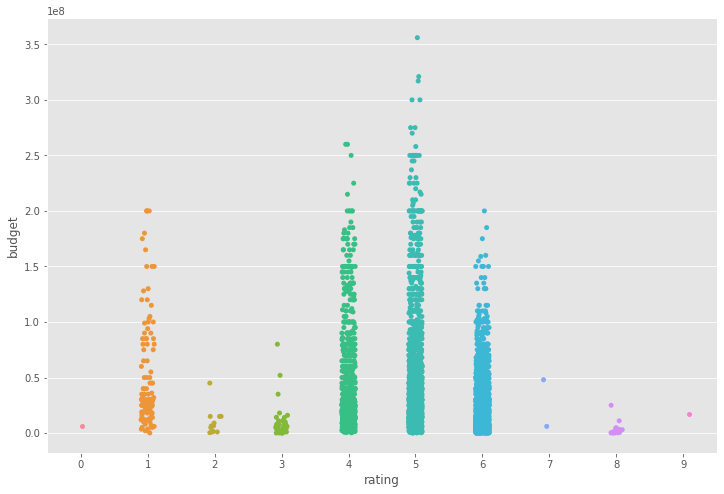

In [75]:
# Budget with Respect to Movie Rating

sns.stripplot(x = "rating", y = "budget", data = df)
plt.show()